# MACHINE LEARNING ENGINEER NANODEGREE
## CAPSTONE PROJECT
###  *PREDICTION OF CONSUMER CREDIT RISK*

### INTRODUCTION

Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. The project aims to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.
The goal of this project is to build a model that borrowers can use to help make the best financial decisions.

The dataset for this project can be found at [Kaggle](https://www.kaggle.com/c/GiveMeSomeCredit/data) which contains historical data on 1,50,000 borrowers characterized by 10 variables.

## DATA EXPLORATION
### Features
* **SeriousDlqin2yrs** - Person experienced 90 days past due delinquency or worse
* **RevolvingUtilizationOfUnsecuredLines** - Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
* **Age** - Age of borrower in years
* **NumberOfTime30-59DaysPastDueNotWorse** - Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
* **DebtRatio** - Monthly debt payments, alimony,living costs divided by monthy gross income.
* **MonthlyIncome** - Monthly Income
* **NumberOfOpenCreditLinesAndLoans** - Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards).
* **NumberOfTimes90DaysLate** - Number of times borrower has been 90 days or more past due.
* **NumberRealEstateLoansOrLines** - Number of mortgage and real estate loans including home equity lines of credit
* **NumberOfTime60-89DaysPastDueNotWorse** - Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
* **NumberOfDependents** - Number of dependents in family excluding themselves (spouse, children etc.)

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

import warnings
warnings.filterwarnings('ignore')

# Pretty display for notebooks
%matplotlib inline 

# Loading the dataset
data = pd.read_csv("cs-training.csv")

# Dropping the first unnamed column
data = data.drop('Unnamed: 0', axis = 1)

# Display the first five records
display(data.head(5))

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### Describe the data statistically

In [2]:
# Analyze the data statistically
# List of first 6 variables
col1 = ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', \
        'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome']

data[col1].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06


In [3]:
# List of remaining 5 variables
col2 = ['NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', \
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

data[col2].describe()

,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,8.452760,0.265973,1.018240,0.240387,0.757222
std,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,0.000000,1.000000,0.000000,0.000000
75%,11.000000,0.000000,2.000000,0.000000,1.000000
max,58.000000,98.000000,54.000000,98.000000,20.000000


In [4]:
# Count all null values in each column of the data.
data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

* The feature `MonthlyIncome` contains 29731 null values,  and
* The feature `NumberOfDependents` contains 3924 null values.

#### OUTLIER DETECTION
Outlier detection is a very important step for any machine learning problem because the presence of outliers can skew our result.
Here I will use [Tukey's Method](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/) for detecting outliers in each variable of the data.

In [5]:
# Initialising a dictionery to store feature_name as key and its corresponding outlier points as values.
d = {}

# Function to detect outliers.
def detect_outliers(feature):
    # For each feature find the data points with extreme high or low values
    #for feature in data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (2 times the interquartile range)
    step = (Q3 - Q1) * 2
    
    outlier_points = data[data[feature] < Q1 - step]
    outlier_points = outlier_points.append(data[data[feature] > Q3 + step])
    d[feature] = outlier_points[feature].tolist()
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':- {}".format(feature, len(outlier_points))

# Calling the function
for i in data.keys():
    detect_outliers(i)

Data points considered outliers for the feature 'SeriousDlqin2yrs':- 10026
Data points considered outliers for the feature 'RevolvingUtilizationOfUnsecuredLines':- 528
Data points considered outliers for the feature 'age':- 2
Data points considered outliers for the feature 'NumberOfTime30-59DaysPastDueNotWorse':- 23982
Data points considered outliers for the feature 'DebtRatio':- 30815
Data points considered outliers for the feature 'MonthlyIncome':- 0
Data points considered outliers for the feature 'NumberOfOpenCreditLinesAndLoans':- 1898
Data points considered outliers for the feature 'NumberOfTimes90DaysLate':- 8338
Data points considered outliers for the feature 'NumberRealEstateLoansOrLines':- 473
Data points considered outliers for the feature 'NumberOfTime60-89DaysPastDueNotWorse':- 7604
Data points considered outliers for the feature 'NumberOfDependents':- 0


In [6]:
from collections import Counter

Counter(data['SeriousDlqin2yrs'])

Counter({0: 139974, 1: 10026})

In [7]:
Counter(data['RevolvingUtilizationOfUnsecuredLines'])

Counter({0.0: 10878,
         1.0: 17,
         0.160987616: 1,
         4.0: 1,
         0.681015017: 1,
         6.0: 1,
         0.08017086: 1,
         0.486265901: 1,
         14.0: 1,
         0.021316387000000003: 1,
         18.0: 1,
         0.585011527: 1,
         0.0878554: 1,
         0.014999643: 1,
         1.093836757: 1,
         0.130082849: 1,
         0.033161045: 1,
         0.835758212: 1,
         0.1143356: 1,
         0.385929831: 1,
         0.11512854900000001: 1,
         0.9040639570000001: 2,
         0.145395995: 1,
         0.618887304: 1,
         0.062214032999999995: 1,
         42.0: 1,
         0.087352815: 1,
         0.15496353400000001: 1,
         0.083558145: 1,
         0.793174767: 1,
         0.054187657: 1,
         0.08716640199999999: 1,
         0.437781109: 1,
         61.0: 1,
         0.256151639: 1,
         0.015399115: 1,
         0.098156039: 1,
         0.6957667209999999: 1,
         0.557624852: 1,
         0.237257728: 1,
    

In [8]:
Counter(data['age'])

Counter({0: 1,
         21: 183,
         22: 434,
         23: 641,
         24: 816,
         25: 953,
         26: 1193,
         27: 1338,
         28: 1560,
         29: 1702,
         30: 1937,
         31: 2038,
         32: 2050,
         33: 2239,
         34: 2155,
         35: 2246,
         36: 2379,
         37: 2521,
         38: 2631,
         39: 2987,
         40: 3093,
         41: 3122,
         42: 3082,
         43: 3208,
         44: 3294,
         45: 3502,
         46: 3714,
         47: 3719,
         48: 3806,
         49: 3837,
         50: 3753,
         51: 3627,
         52: 3609,
         53: 3648,
         54: 3561,
         55: 3416,
         56: 3589,
         57: 3375,
         58: 3443,
         59: 3280,
         60: 3258,
         61: 3522,
         62: 3568,
         63: 3719,
         64: 3058,
         65: 2594,
         66: 2494,
         67: 2503,
         68: 2235,
         69: 1954,
         70: 1777,
         71: 1646,
         72: 1649,
  

In [9]:
Counter(data['NumberOfTime30-59DaysPastDueNotWorse'])

Counter({0: 126018,
         1: 16033,
         2: 4598,
         3: 1754,
         4: 747,
         5: 342,
         6: 140,
         7: 54,
         8: 25,
         9: 12,
         10: 4,
         11: 1,
         12: 2,
         13: 1,
         96: 5,
         98: 264})

In [10]:
Counter(data['DebtRatio'])

Counter({0.0: 4113,
         1.0: 229,
         2.0: 170,
         3.0: 162,
         4.0: 174,
         5.0: 143,
         6.0: 112,
         7.0: 115,
         8.0: 106,
         9.0: 125,
         10.0: 117,
         11.0: 108,
         12.0: 102,
         13.0: 114,
         14.0: 101,
         15.0: 98,
         16.0: 86,
         17.0: 65,
         18.0: 83,
         19.0: 91,
         20.0: 83,
         21.0: 99,
         22.0: 78,
         23.0: 70,
         24.0: 79,
         25.0: 78,
         26.0: 69,
         27.0: 76,
         28.0: 80,
         29.0: 77,
         30.0: 78,
         31.0: 61,
         32.0: 59,
         0.45035804100000004: 1,
         34.0: 60,
         35.0: 66,
         36.0: 61,
         0.35381949100000004: 1,
         38.0: 60,
         39.0: 47,
         40.0: 49,
         41.0: 59,
         42.0: 53,
         43.0: 59,
         44.0: 57,
         45.0: 61,
         46.0: 35,
         47.0: 52,
         48.0: 41,
         49.0: 47,
         50.0: 4

In [11]:
# Ignore null values
x = data[~(data['MonthlyIncome'].isnull())]
Counter(x['MonthlyIncome'])

Counter({0.0: 1634,
         1.0: 605,
         2.0: 6,
         4.0: 2,
         5.0: 2,
         7.0: 1,
         9.0: 1,
         10.0: 2,
         11.0: 1,
         15.0: 1,
         5464.0: 5,
         21.0: 1,
         25.0: 1,
         27.0: 2,
         34.0: 1,
         40.0: 3,
         42.0: 1,
         50.0: 4,
         55.0: 1,
         56.0: 1,
         69.0: 1,
         70.0: 2,
         72.0: 1,
         75.0: 1,
         83.0: 1,
         84.0: 1,
         100.0: 24,
         101.0: 1,
         105.0: 1,
         107.0: 1,
         115.0: 1,
         120.0: 1,
         124.0: 1,
         125.0: 2,
         126.0: 1,
         32900.0: 1,
         135.0: 2,
         140.0: 2,
         147.0: 1,
         150.0: 6,
         151.0: 3,
         160.0: 1,
         166.0: 1,
         167.0: 1,
         170.0: 2,
         179.0: 2,
         180.0: 1,
         181.0: 1,
         183.0: 1,
         189.0: 2,
         192.0: 1,
         197.0: 1,
         200.0: 44,
         201.0:

In [12]:
Counter(data['NumberOfOpenCreditLinesAndLoans'])

Counter({0: 1888,
         1: 4438,
         2: 6666,
         3: 9058,
         4: 11609,
         5: 12931,
         6: 13614,
         7: 13245,
         8: 12562,
         9: 11355,
         10: 9624,
         11: 8321,
         12: 7005,
         13: 5667,
         14: 4546,
         15: 3645,
         16: 3000,
         17: 2370,
         18: 1874,
         19: 1433,
         20: 1169,
         21: 864,
         22: 685,
         23: 533,
         24: 422,
         25: 337,
         26: 239,
         27: 194,
         28: 150,
         29: 114,
         30: 88,
         31: 74,
         32: 52,
         33: 47,
         34: 35,
         35: 27,
         36: 18,
         37: 7,
         38: 13,
         39: 9,
         40: 10,
         41: 4,
         42: 8,
         43: 8,
         44: 2,
         45: 8,
         46: 3,
         47: 2,
         48: 6,
         49: 4,
         50: 2,
         51: 2,
         52: 3,
         53: 1,
         54: 4,
         56: 2,
         57: 2,
  

In [13]:
Counter(data['NumberOfTimes90DaysLate'])

Counter({0: 141662,
         1: 5243,
         2: 1555,
         3: 667,
         4: 291,
         5: 131,
         6: 80,
         7: 38,
         8: 21,
         9: 19,
         10: 8,
         11: 5,
         12: 2,
         13: 4,
         14: 2,
         15: 2,
         17: 1,
         96: 5,
         98: 264})

In [14]:
Counter(data['NumberRealEstateLoansOrLines'])

Counter({0: 56188,
         1: 52338,
         2: 31522,
         3: 6300,
         4: 2170,
         5: 689,
         6: 320,
         7: 171,
         8: 93,
         9: 78,
         10: 37,
         11: 23,
         12: 18,
         13: 15,
         14: 7,
         15: 7,
         16: 4,
         17: 4,
         18: 2,
         19: 2,
         20: 2,
         21: 1,
         23: 2,
         25: 3,
         26: 1,
         29: 1,
         32: 1,
         54: 1})

In [15]:
Counter(data['NumberOfTime60-89DaysPastDueNotWorse'])

Counter({0: 142396,
         1: 5731,
         2: 1118,
         3: 318,
         4: 105,
         5: 34,
         6: 16,
         7: 9,
         8: 2,
         9: 1,
         11: 1,
         96: 5,
         98: 264})

In [16]:
# Ignore null values
x = data[~(data['NumberOfDependents'].isnull())]
Counter(x['NumberOfDependents'])

Counter({0.0: 86902,
         1.0: 26316,
         2.0: 19522,
         3.0: 9483,
         4.0: 2862,
         5.0: 746,
         6.0: 158,
         7.0: 51,
         8.0: 24,
         9.0: 5,
         10.0: 5,
         13.0: 1,
         20.0: 1})

### OBSERVATION

After observing the results from `data.describe()`, `data.isnull().sum()` and `Counter(data[feature])`, I noticed these points about each feature:-

* **SeriousDlqin2yrs :-** It is the target variable and contains no null values. Also it is heavily biased and contains only 10026 (6.684%) values which are 1 and the rest are 0. It implies that removing any row from the data for removing outliers or null values from other variables might increase biasness in the data which might affect the final result drastically.


* **RevolvingUtilizationOfUnsecuredLines :-** Mean = 6.048438, median = 0.154181, min = 0 and max = 50708. There are no null values and number of outliers detected are 528. It clearly indicates that the data is not normalized and highly skewed and most of the data points are less than or equal to 1 or 2.


* **age :-** For this attribute, Mean = 52.295207, median = 52.000000, min = 0.000000 and max = 109.000000. There are no null values and by looking at mean and median, the data appears to be normalized. Also, outliers in this variable can easily be spotted by looking at its min value and Counter(data['age']) results which indicates that age = 0 is clearly an outlier as the age cannot be 0. So, the min age is 21 and max age is 109.


* **NumberOfTime30-59DaysPastDueNotWorse :-** Mean = 0.421033, median = 0.000000, min = 0.000000 and max = 98.000000. There are no null values and the data is not normalized or highly skewed. Tukey's method detected 23982 outliers in the data but I think by looking at the Counter() results, real outliers can easily be detected. There are two values i.e 96 and 98 which are clearly the outlier values in the data because out of 150,000 data points, 149,731 data points have values less than 14 and 269 data points have values as 96 and 98.


* **DebtRatio :-** Mean = 353.005076, median = 0.366508, min = 0.000000 and max = 329664.000000. There are no null values and the data appears to be highly skewed. This means that there must be many outliers and which is true because Tukey's outliers detection method detected 30815 outliers in the data. Also, I could not conclude anything after looking at the Counter(data['DebtRatio']). So, I think I have to use the results of Tukey's method to replace outliers with some other value. One method is to replace all the detected outliers with their minimum value.


* **MonthlyIncome :-** Mean = 6670.221, median = 5400.000, min = 0.000000 and max = 3008750.000 and there are 29731 null values in the data. Tukey's outlier detection method detected 0 outliers in the data.


* **NumberOfOpenCreditLinesAndLoans :-**  Mean = 8.452760, median = 8.000000, min = 0.000000 and max = 58.000000 and there are no null values in the data. The data appears to be slightly skewed to the left and number of detected outliers are 1898. But after looking carefully at the Counter() results, I concluded that value > 49 can be considered as outliers and hence values above 49 can be replaced as 49.


* **NumberOfTimes90DaysLate :-** Mean = 0.265973, median = 0.000000, min = 0.000000 and max = 98.000000, there are no null values and Data is not normalized. 8338 outlier points are detected but after examining the results from Counter(), actual number of outliers can easily be noticed. All the data values are less than 18 except for 2 values(96 and 98). Hence, 96 and 98 could be the possible outlier points.


* **NumberRealEstateLoansOrLines :-** Here, Mean = 1.018240, median = 1.000000, min = 0.000000 and max = 54.000000 and there are no null values in the data. total 473 possible outliers are detected. But, actually all the values greater than 15 can be considered as actual outliers because frequency of these values are very less as compared to all other values. Also data appears to be highly skewed.


* **NumberOfTime60-89DaysPastDueNotWorse :-** Mean = 0.240387, median = 0.000000, min = 0.000000 and max = 98.000000 and there are no null values in the data and two values i.e 96 and 98 can be considered as outliers. Data is highly skewed.


* **NumberOfDependents :-** Mean = 0.757222, median = 0.000000, min = 0.000000 and max = 20.000000 and there are 3924 null values in the data. Total detected outliers are 0 but values 13 and 20 can be considered as the actual outliers in the data. For this feature, I think the null values can be replaced by the median of the data **(because we cannot remove any row as the target variable is highly biased)** as the median is less sensitive to outliers.

In [17]:
# Split the data into features and target
target = data['SeriousDlqin2yrs']
features = data.drop('SeriousDlqin2yrs', axis = 1)
print(target.shape)
print(features.shape)

(150000,)
(150000, 10)


## Data Visualization

### Target visualization

				Pie chart for 'SeriousDlqin2yrs'


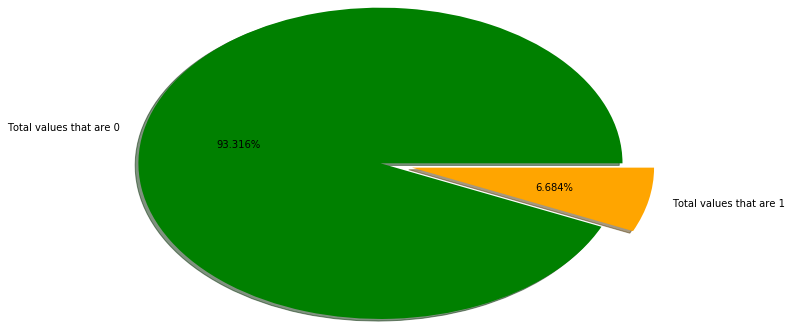

In [18]:
import matplotlib.pyplot as plt

count = [0,0]
for i in data.SeriousDlqin2yrs:
    if i == 0:
        count[0] += 1
    elif i == 1:
        count[1] += 1

explode = [0, 0.2]
labels = ['Total values that are 0', 'Total values that are 1']
colors = ['green', 'orange']

fig = plt.figure()
ax = fig.add_subplot(111)
ax.pie(count, explode = explode,
       labels = labels, autopct='%1.3f%%',
       colors = colors, radius = 1.5, shadow = True)

print("\t\t\t\tPie chart for 'SeriousDlqin2yrs'")
plt.tight_layout()
plt.show()

### Features visualization

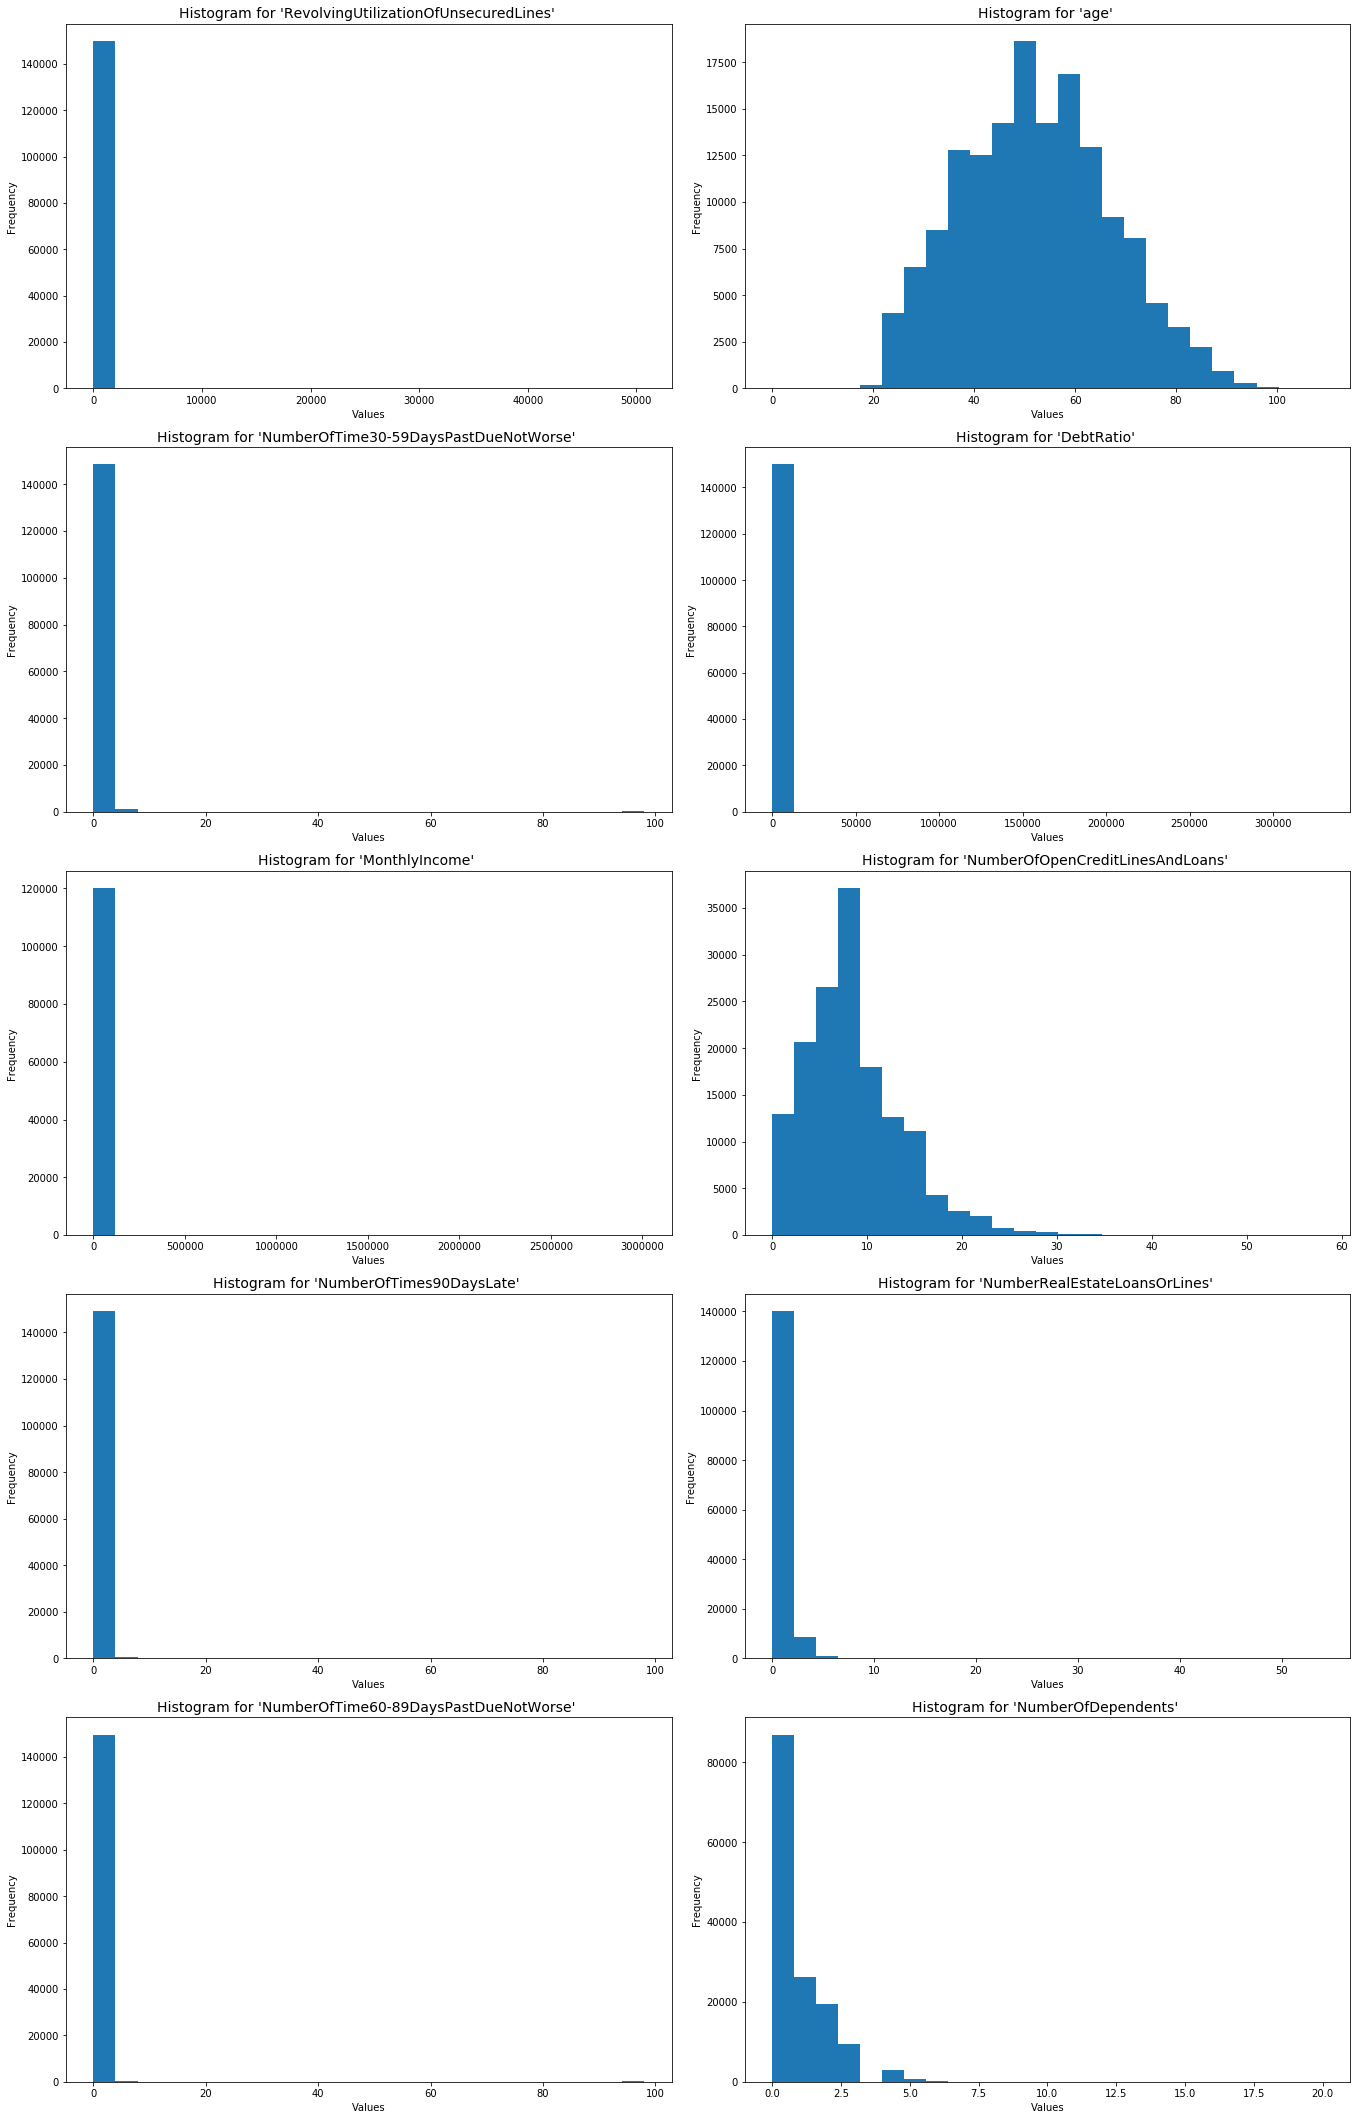

In [19]:
fig = plt.figure(figsize = (19, 35))

for i, x in enumerate(features.keys()):
    ax = fig.add_subplot(6, 2, i+1)
    ax.hist(features[~(features[x].isnull())][x], bins = 25)
    ax.set_title("Histogram for '%s' "%(x), fontsize = 14)
    ax.set_xlabel("Values")
    ax.set_ylabel("Frequency")
    
fig.tight_layout()
plt.show()

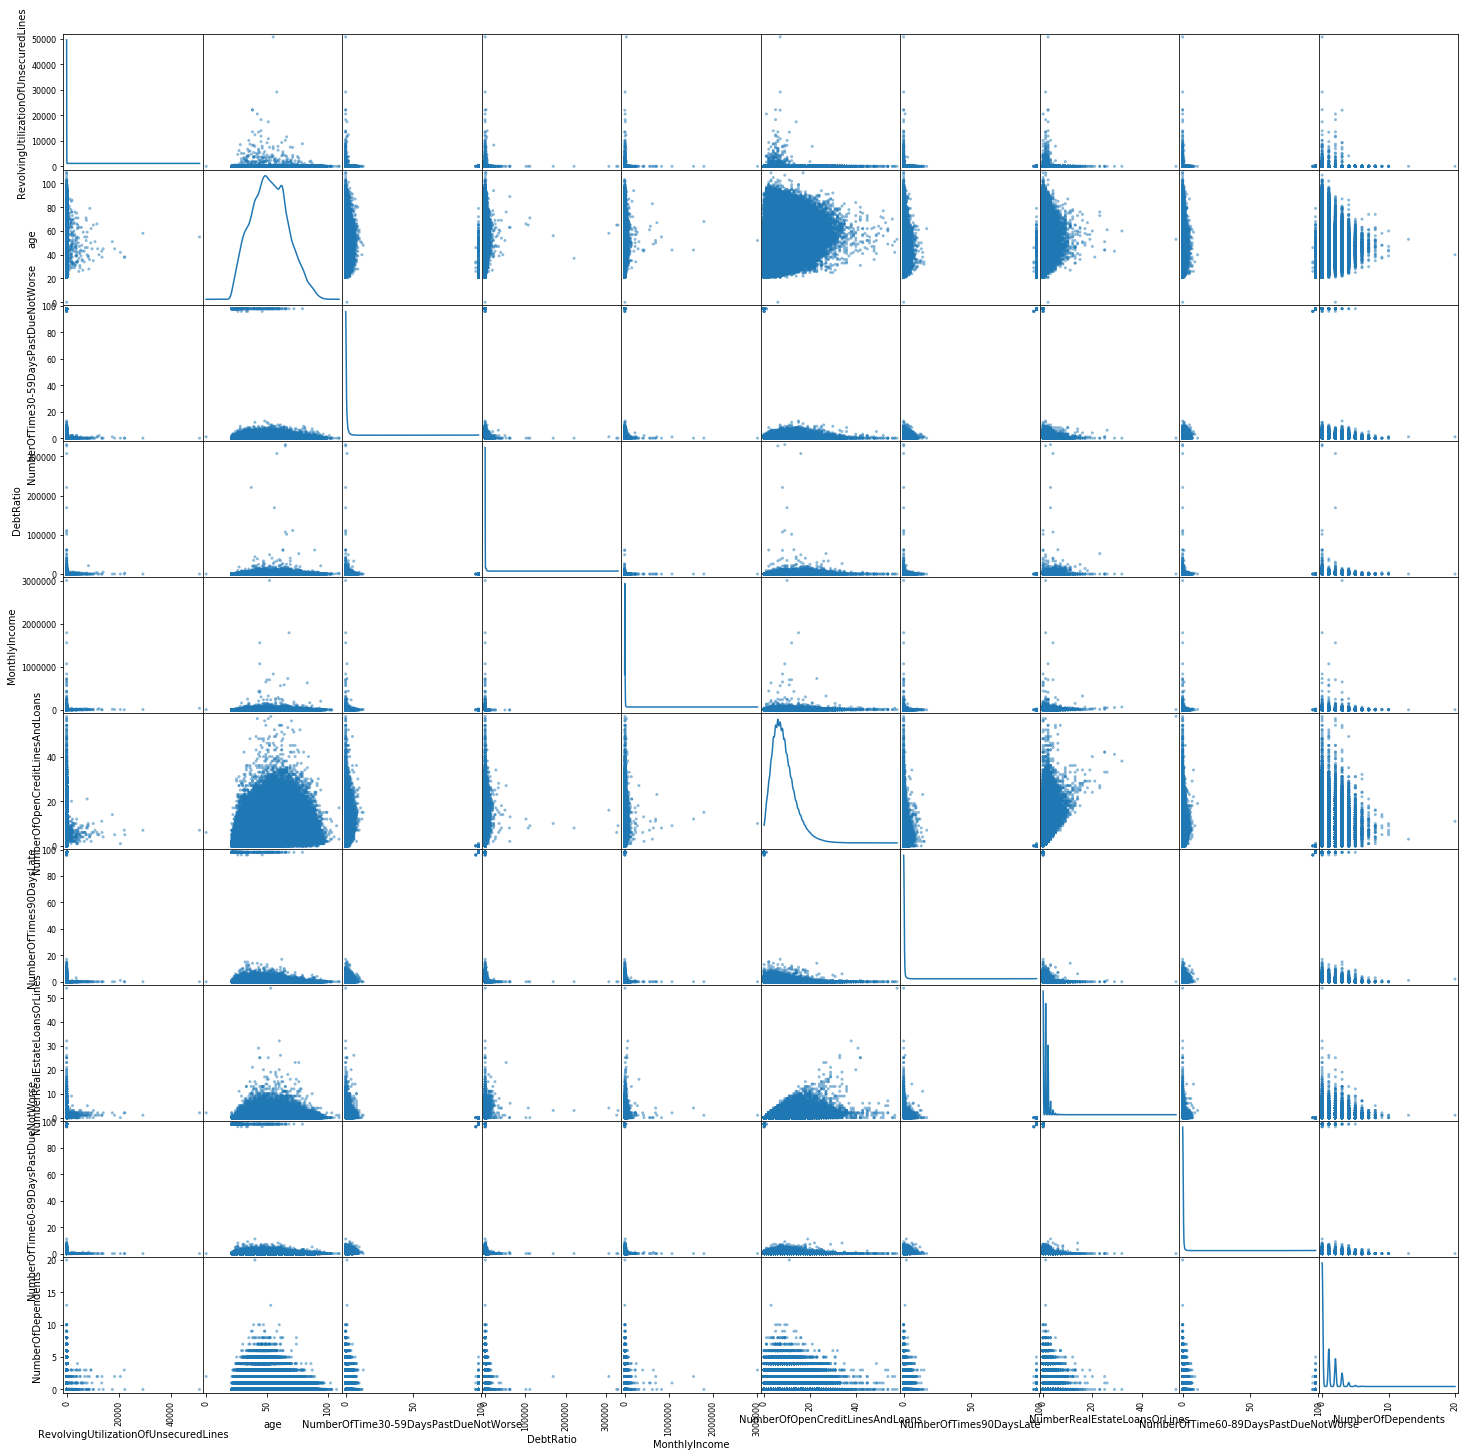

In [20]:
from pandas.plotting import scatter_matrix
temp = scatter_matrix(features, alpha = 0.5, figsize = (25, 25), diagonal = 'kde')

### OBSERVATION

From the scatter matrix plotted above, it appears to me that features `(NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse)`, `(NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate)` and `(NumberOfTime60-89DaysPastDueNotWorse, NumberOfTimes90DaysLate)` are correlated to each other.

In [21]:
# Print highly correlated features
col = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate']
for i in range(len(col)):
    for j in range(len(col)):
        if i < j:
            print(col[i], col[j], np.corrcoef(features[col[i]], features[col[j]])[0][1])

('NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 0.987005447479946)
('NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 0.9836026812820766)
('NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 0.9927961825915981)


## Again plotting the graph of correlated features

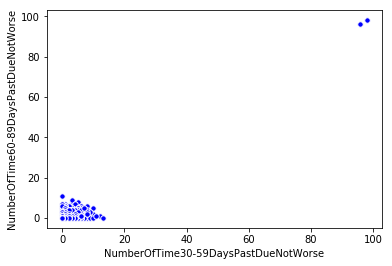

In [22]:
plt.xlabel("NumberOfTime30-59DaysPastDueNotWorse")
plt.ylabel("NumberOfTime60-89DaysPastDueNotWorse")

plt.scatter(x = features["NumberOfTime30-59DaysPastDueNotWorse"], 
            y = features["NumberOfTime60-89DaysPastDueNotWorse"], 
            facecolors = 'blue', edgecolors = 'white', s = 30)

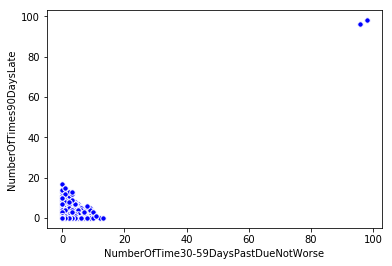

In [23]:
plt.xlabel("NumberOfTime30-59DaysPastDueNotWorse")
plt.ylabel("NumberOfTimes90DaysLate")

plt.scatter(x = features["NumberOfTime30-59DaysPastDueNotWorse"], 
            y = features["NumberOfTimes90DaysLate"], 
           facecolors = 'blue', edgecolors = 'white', s = 30)

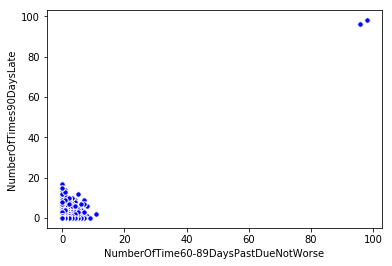

In [24]:
plt.xlabel("NumberOfTime60-89DaysPastDueNotWorse")
plt.ylabel("NumberOfTimes90DaysLate")

plt.scatter(x = features["NumberOfTime60-89DaysPastDueNotWorse"], 
            y = features["NumberOfTimes90DaysLate"], 
           facecolors = 'blue', edgecolors = 'white', s = 30)

# Benchmark Model

Here, I will use **Logistic Regression** with default parameters for defining my benchmark model as it is the most simplest model to implement. Also I will do this without doing any data pre-processing or feature scaling or hyper-tuning.

Two of the features i.e `NumberOfDependents` and `MonthlyIncome` contain **null values** which will create an error while training data on benchmark model, hence i will use a very simple method and replace these values with median.

In [25]:
import math

benchmark_features = data.drop('SeriousDlqin2yrs', axis = 1)
benchmark_target = data['SeriousDlqin2yrs']

med = benchmark_features['NumberOfDependents'].median()
x = []
for i in benchmark_features['NumberOfDependents']:
    if math.isnan(i):
        x.append(med)
    else:
        x.append(i)
        
benchmark_features['NumberOfDependents'] = x


med = benchmark_features['MonthlyIncome'].median()
x = []
for i in benchmark_features['MonthlyIncome']:
    if math.isnan(i):
        x.append(med)
    else:
        x.append(i)
        
benchmark_features['MonthlyIncome'] = x

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import time

benchmark_X_train, benchmark_X_test, benchmark_y_train, benchmark_y_test = train_test_split(benchmark_features, 
                                                                                            benchmark_target, 
                                                                                            test_size = 0.2)

# Show the results of the split
print "Samples in training set = {}.".format(benchmark_X_train.shape[0])
print "Samples in testing set = {}.".format(benchmark_X_test.shape[0])

benchmark = LogisticRegression()
bench_start_time = time.time()
benchmark.fit(benchmark_X_train, benchmark_y_train)
bench_end_time = time.time()
bench_time_taken = bench_end_time - bench_start_time

# Printing score
predicted_prob = benchmark.predict_proba(benchmark_X_train)
fpr_bench_train, tpr_bench_train, threshold_bench_train = roc_curve(benchmark_y_train, predicted_prob[:, 1])

predicted_prob = benchmark.predict_proba(benchmark_X_test)
fpr_bench_test, tpr_bench_test, threshold_bench_test = roc_curve(benchmark_y_test, predicted_prob[:, 1])
auc_bench_train = auc(fpr_bench_train, tpr_bench_train)
auc_bench_test = auc(fpr_bench_test, tpr_bench_test)

diff_auc = auc_bench_train - auc_bench_test

print("AUC score on training data = {}".format(auc_bench_train))
print("AUC score on testing data = {}".format(auc_bench_test))
print("Difference in AUC value (train - test) = {}".format(diff_auc))
print("Time taken to train the model = {} sec".format(bench_time_taken))

Samples in training set = 120000.
Samples in testing set = 30000.
AUC score on training data = 0.69648388494
AUC score on testing data = 0.708517391115
Difference in AUC value (train - test) = -0.0120335061752
Time taken to train the model = 1.56961679459 sec


## Data Pre-processing

** Here, I have only written a method to remove correlated features but i did not implement it into my model because it gave me an AUC score of 0.8294 which is lesser than the AUC score that I got by `not` removing correlated featres. **

### Removing correlated features

In [27]:
# Selecting 2 most correlated features to remove

'''corr_matrix = features.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print("Two of the most correlated features are")
print(to_drop)
'''

'corr_matrix = features.corr().abs()\nupper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))\nto_drop = [column for column in upper.columns if any(upper[column] > 0.95)]\nprint("Two of the most correlated features are")\nprint(to_drop)\n'

In [28]:
# Removing selected features

'''print(features.shape)
#features = features.drop(to_drop[0], axis = 1)   # Uncomment both of these lines
#features = features.drop(to_drop[1], axis = 1)   # to remove correlated features
print(features.shape)
'''

'print(features.shape)\n#features = features.drop(to_drop[0], axis = 1)   # Uncomment both of these lines\n#features = features.drop(to_drop[1], axis = 1)   # to remove correlated features\nprint(features.shape)\n'

#### NumberOfDependents

In [27]:
import math

data_med = features['NumberOfDependents'].median()
x = []
for i in features['NumberOfDependents']:
    if math.isnan(i):
        x.append(data_med)
    elif i == 13 or i == 20:
        x.append(10)
    else:
        x.append(i)
        
features['NumberOfDependents'] = x

#### NumberOfTime60-89DaysPastDueNotWorse

In [28]:
data_med = features['NumberOfTime60-89DaysPastDueNotWorse'].median()
x = []
for i in features['NumberOfTime60-89DaysPastDueNotWorse']:
    if i == 96 or i == 98:
        x.append(data_med)
    else:
        x.append(i)
        
features['NumberOfTime60-89DaysPastDueNotWorse'] = x

#### NumberRealEstateLoansOrLines

In [29]:
x = []
for i in features['NumberRealEstateLoansOrLines']:
    if i > 15:
        x.append(15)
    else:
        x.append(i)
        
features['NumberRealEstateLoansOrLines'] = x

#### NumberOfTimes90DaysLate

In [30]:
data_med = features['NumberOfTimes90DaysLate'].median()
x = []
for i in features['NumberOfTimes90DaysLate']:
    if i == 96 or i == 98:
        x.append(data_med)
    else:
        x.append(i)
        
features['NumberOfTimes90DaysLate'] = x

#### NumberOfOpenCreditLinesAndLoans

In [31]:
x = []
for i in features['NumberOfOpenCreditLinesAndLoans']:
    if i > 49:
        x.append(49)
    else:
        x.append(i)
        
features['NumberOfOpenCreditLinesAndLoans'] = x

#### DebtRatio

In [32]:
Q1 = np.percentile(features['DebtRatio'], 25)
Q3 = np.percentile(features['DebtRatio'], 75)
step = (Q3 - Q1) * 2
x = features[features['DebtRatio'] < Q1 - step].DebtRatio
y = features[features['DebtRatio'] > Q3 + step].DebtRatio
min_y = min(y)

temp = []
for i in features['DebtRatio']:
    if i > min_y:
        temp.append(min_y)
    else:
        temp.append(i)
        
features['DebtRatio'] = temp

#### NumberOfTime30-59DaysPastDueNotWorse

In [33]:
data_med = features['NumberOfTime30-59DaysPastDueNotWorse'].median()
x = []
for i in features['NumberOfTime30-59DaysPastDueNotWorse']:
    if i == 96 or i == 98:
        x.append(data_med)
    else:
        x.append(i)
        
features['NumberOfTime30-59DaysPastDueNotWorse'] = x

#### age

In [34]:
x = []
for i in features['age']:
    if i == 0:
        x.append(21)
    else:
        x.append(i)
        
features['age'] = x

#### RevolvingUtilizationOfUnsecuredLines

In [35]:
x = []
for i in features['RevolvingUtilizationOfUnsecuredLines']:
    if i > 1.0:
        x.append(1.0)
    else:
        x.append(i)
        
features['RevolvingUtilizationOfUnsecuredLines'] = x

#### MonthlyIncome

In [36]:
inc_features = features[features['MonthlyIncome'].isnull() == False]
inc_target = inc_features['MonthlyIncome']
inc_features = inc_features.drop('MonthlyIncome', axis = 1)
inc_to_predict = features[features['MonthlyIncome'].isnull() == True]
inc_to_predict = inc_to_predict.drop('MonthlyIncome', axis = 1)

print(inc_features.shape)
print(inc_target.shape)
print(inc_to_predict.shape)

(120269, 9)
(120269,)
(29731, 9)


In [37]:
from sklearn.model_selection import train_test_split

inc_X_train, inc_X_test, inc_y_train, inc_y_test = train_test_split(inc_features, inc_target, 
                                                                    test_size = 0.2, random_state = 0)
print(inc_X_train.shape)
print(inc_y_train.shape)
print(inc_X_test.shape)
print(inc_y_test.shape)

(96215, 9)
(96215,)
(24054, 9)
(24054,)


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [39]:
linear_reg = LinearRegression()
linear_reg.fit(inc_X_train, inc_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
rf_reg = RandomForestRegressor(n_estimators = 25, criterion = 'mse', min_samples_leaf = 1, min_samples_split = 2)
rf_reg.fit(inc_X_train, inc_y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [41]:
ab_reg = AdaBoostRegressor(n_estimators = 70)
ab_reg.fit(inc_X_train, inc_y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=70, random_state=None)

In [42]:
gbr_reg = GradientBoostingRegressor(n_estimators = 120, min_samples_leaf = 1, min_samples_split = 2)
gbr_reg.fit(inc_X_train, inc_y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=120, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [43]:
mlp_reg = MLPRegressor(hidden_layer_sizes = (500,),  activation = 'relu', 
                       solver = 'adam', alpha = 0.001, batch_size = 'auto', 
                       learning_rate_init = 0.01, max_iter = 400, tol = 0.0001, 
                       verbose = False, validation_fraction = 0.15, beta_2 = 0.999, epsilon = 1e-08)

mlp_reg.fit(inc_X_train, inc_y_train)

MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=400, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.15,
       verbose=False, warm_start=False)

In [44]:
xgb_reg = XGBRegressor(n_estimators = 120, learning_rate = 0.06, gamma = 0, subsample = 0.75, 
                       colsample_bytree = 1)
xgb_reg.fit(inc_X_train, inc_y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.06, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=120,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [45]:
reg_dict = {'LinearRegression' : linear_reg, 'RandomForestRegressor' : rf_reg, 'AdaBoostRegressor' : ab_reg, 
           'GradientBoostingRegressor' : gbr_reg, 'MLPRegressor' : mlp_reg, 'XGBRegressor' : xgb_reg}

In [46]:
# function to check best score
def best_score(reg_dict, inc_X_test, inc_y_test):
    scr_dict = dict()
    for i in reg_dict.keys():
        scr_dict[i] = reg_dict[i].score(inc_X_test, inc_y_test)
    
    return scr_dict

In [47]:
# Calling the above method
scr_dict = best_score(reg_dict, inc_X_test, inc_y_test)
# Printing all the scores
print('R2 scores for all the models are:\n')
for keys, values in scr_dict.items():
    print(keys),
    print(" : "),
    print(values)

R2 scores for all the models are:

GradientBoostingRegressor  :  0.4872510705401399
XGBRegressor  :  0.35179397164168114
LinearRegression  :  0.06487570572959467
AdaBoostRegressor  :  -3.6358672304797732
RandomForestRegressor  :  0.5126828311991303
MLPRegressor  :  0.159753391693092


#### RandomForestRegressor seems to perform best among all the models

In [48]:
# Tuning randomforest regressor
from sklearn.model_selection import GridSearchCV

rf_param_reg = {'n_estimators' : [10, 15, 20, 25, 30]}

rf_grid_reg = GridSearchCV(estimator = rf_reg, param_grid = rf_param_reg, scoring = 'r2', 
                      n_jobs = 1, cv = None, verbose = 0)

rf_grid_reg.fit(inc_X_train, inc_y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 15, 20, 25, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

In [49]:
print(rf_grid_reg.best_estimator_)
print(rf_grid_reg.best_score_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
-1.27905248594855


In [50]:
rf_grid_reg.best_estimator_.fit(inc_X_train, inc_y_train)
x = rf_grid_reg.best_estimator_.predict(inc_to_predict)

In [51]:
pd.Series(x).describe()

count     29731.000000
mean        799.776119
std        1803.706334
min           0.000000
25%          44.566667
50%         297.533333
75%         922.866667
max      163034.333333
dtype: float64

In [52]:
temp2 = features[features['MonthlyIncome'].isnull() == True]
temp2['MonthlyIncome'] = x
idx = 0
temp3 = []
for i in range(0, 150000):
    if math.isnan(features['MonthlyIncome'].iloc[i]) == True:
        temp3.append(temp2['MonthlyIncome'].iloc[idx])
        idx += 1
    else:
        temp3.append(features['MonthlyIncome'].iloc[i])
        
features['MonthlyIncome'] = temp3

In [53]:
features.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.319196,52.295347,0.245353,0.735348,5.506660e+03,8.452240,0.090293,1.017113,0.064707,0.737327
std,0.349481,14.771470,0.697231,0.820245,1.311592e+04,5.141554,0.485107,1.107611,0.329788,1.105968
min,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,2.000000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,4.424500e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,109.000000,13.000000,2.256743,3.008750e+06,49.000000,17.000000,15.000000,11.000000,10.000000


In [54]:
features.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

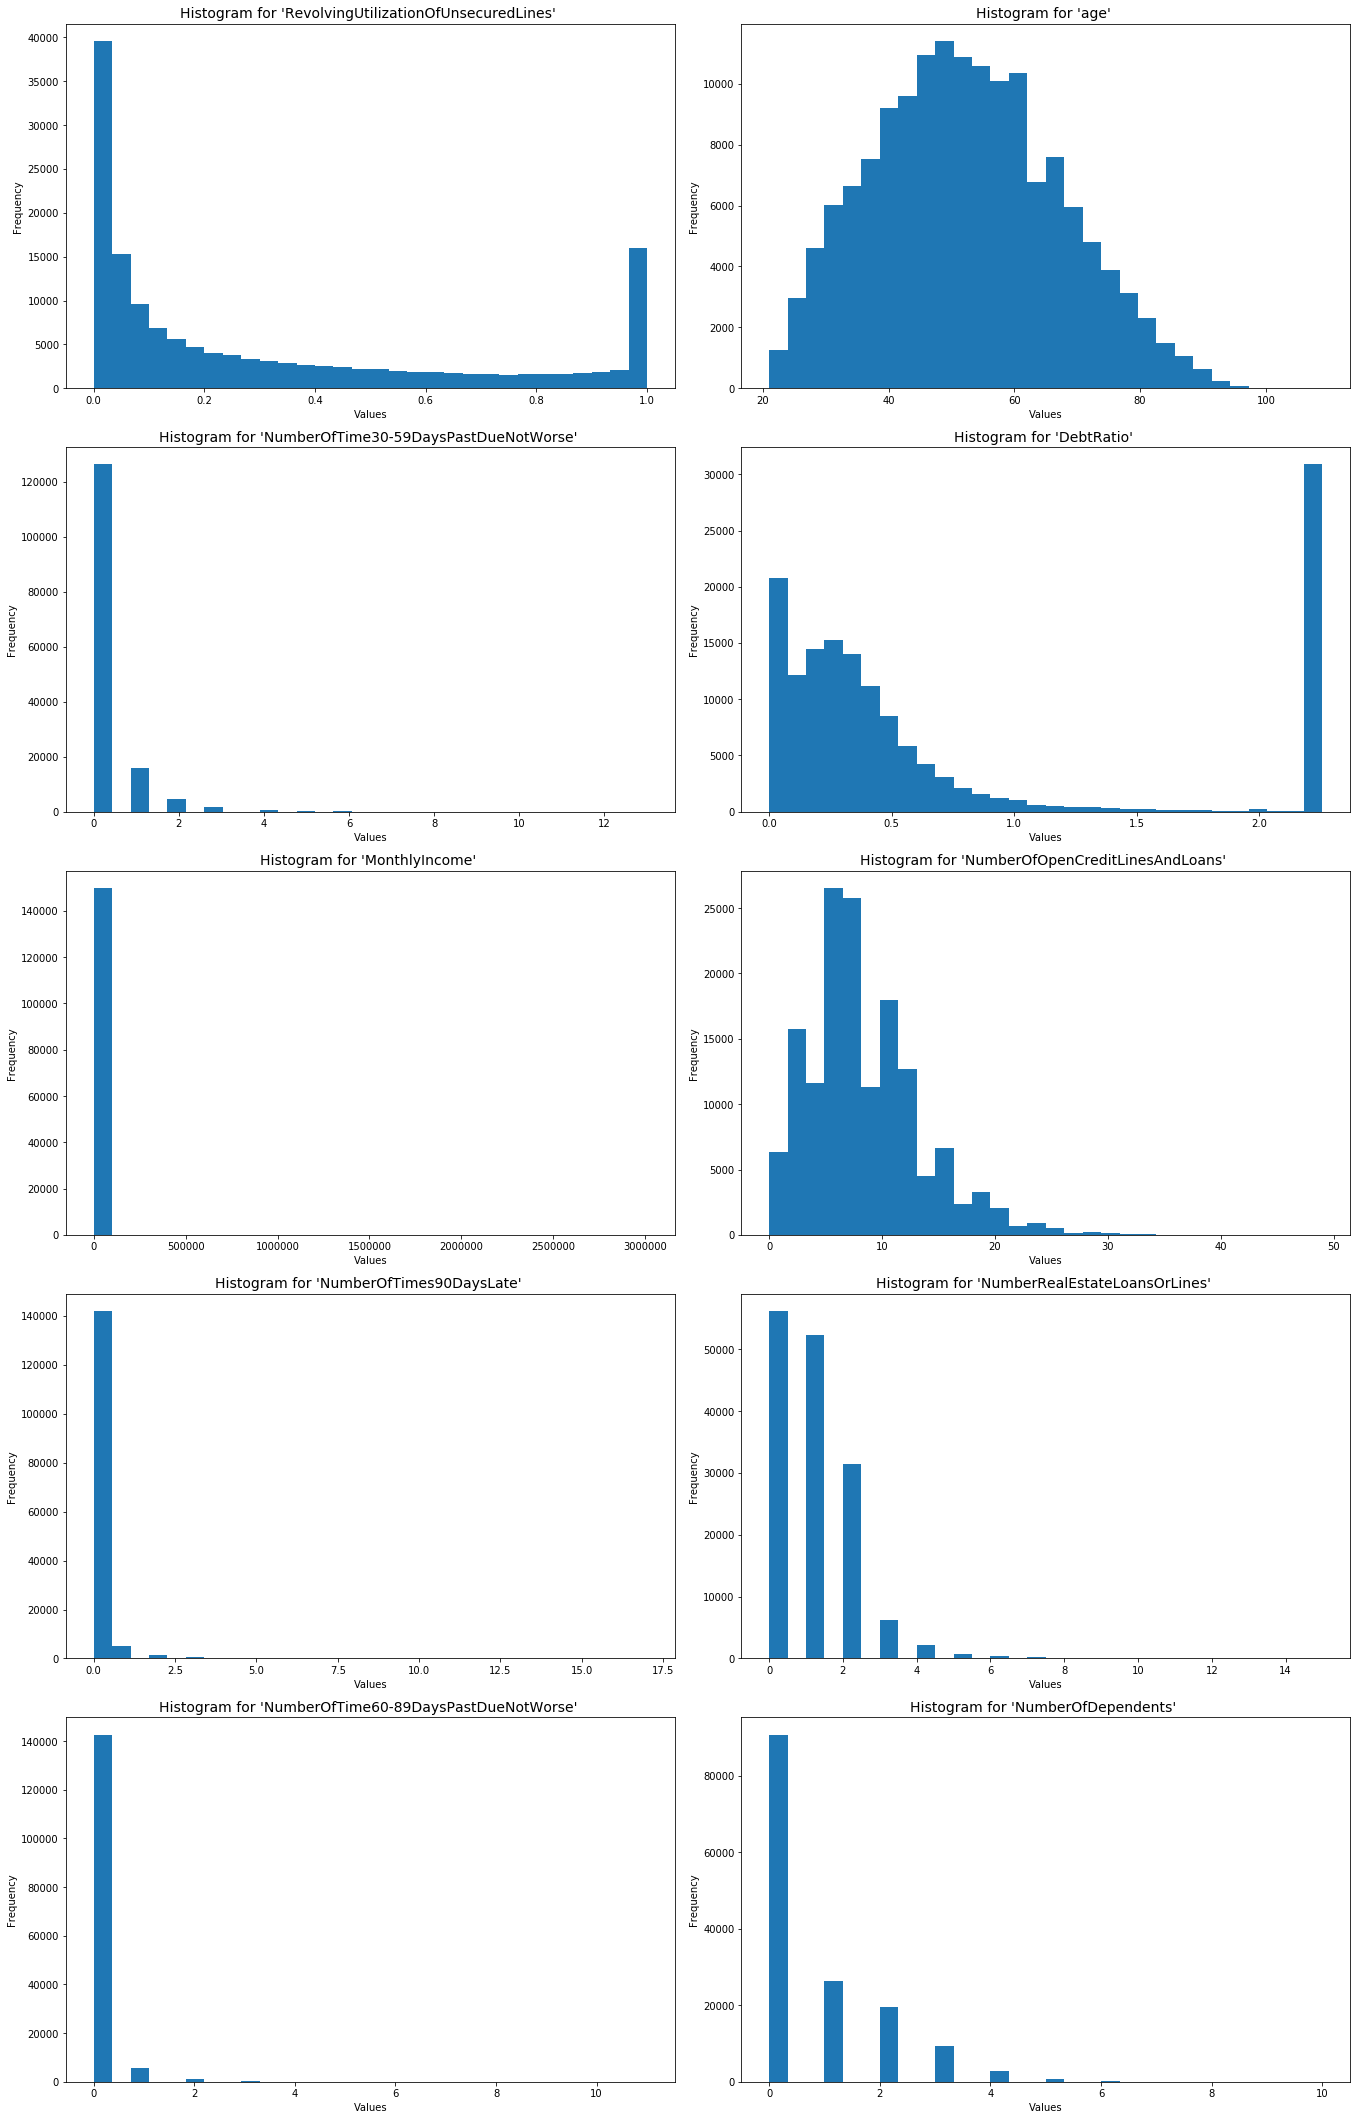

In [55]:
fig = plt.figure(figsize = (19, 35))

for i, x in enumerate(features.keys()):
    ax = fig.add_subplot(6, 2, i+1)
    ax.hist(features[~(features[x].isnull())][x], bins = 30)
    ax.set_title("Histogram for '%s' "%(x), fontsize = 14)
    ax.set_xlabel("Values")
    ax.set_ylabel("Frequency")
    
fig.tight_layout()
plt.show()

### TRAIN-TEST SPLIT

In [56]:
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 0)

# Show the results of the split
print "Samples in training set = {}.".format(X_train.shape[0])
print "Samples in testing set = {}.".format(X_test.shape[0])

Samples in training set = 120000.
Samples in testing set = 30000.


### PCA IMPLEMENTATION

In [57]:
# Import pca
from sklearn import decomposition

# implementation
pca_clf = decomposition.PCA(n_components = 2)
pca_clf.fit(features)
trans = pca_clf.transform(features)
print(pca_clf.explained_variance_ratio_.cumsum())   # cumulative sum

[0.99999856 0.99999983]


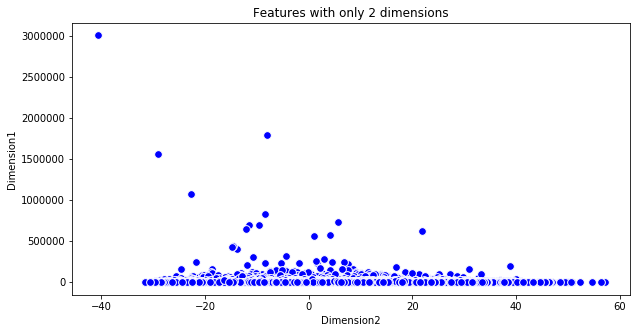

In [58]:
df = pd.DataFrame(trans, columns = ['Dimension1', 'Dimension2'])
fig, ax = plt.subplots(figsize = (10, 5))
ax.scatter(x = df.loc[:, 'Dimension2'], y = df.loc[:, 'Dimension1'], 
           facecolors = 'blue', edgecolors = 'white', s = 60)
ax.set_xlabel("Dimension2")
ax.set_ylabel("Dimension1")
ax.set_title("Features with only 2 dimensions")
plt.show()

### Train the model

In [59]:
# Importing some classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
import time

In [60]:
time_dict = dict()

In [61]:
logistic_clf = LogisticRegression(penalty = 'l2', dual = False, C = 100.0, fit_intercept = True, 
                                 random_state = None, solver = 'liblinear', max_iter = 150)

start_time = time.time()
logistic_clf.fit(X_train, y_train)
end_time = time.time()
time_taken = end_time - start_time
time_dict['LogisticRegression'] = [time_taken]

In [62]:
gb_clf = GradientBoostingClassifier(loss = 'deviance', learning_rate = 0.1, n_estimators = 120, 
                                   verbose = 0, random_state = None)
start_time = time.time()
gb_clf.fit(X_train, y_train)
end_time = time.time()
time_taken = end_time - start_time
time_dict['GradientBoostingClassifier'] = [time_taken]

In [63]:
rf_clf = RandomForestClassifier(n_estimators = 20, criterion = 'gini', max_features = 'auto', 
                                 min_samples_split = 2, min_samples_leaf = 1, 
                                 random_state = None, verbose = 0)
start_time = time.time()
rf_clf.fit(X_train, y_train)
end_time = time.time()
time_taken = end_time - start_time
time_dict['RandomForestClassifier'] = [time_taken]

In [64]:
ab_clf = AdaBoostClassifier(n_estimators = 70, learning_rate = 1.0, random_state = None)

start_time = time.time()
ab_clf.fit(X_train, y_train)
end_time = time.time()
time_taken = end_time - start_time
time_dict['AdaBoostClassifier'] = [time_taken]

In [65]:
et_clf = ExtraTreesClassifier(n_estimators = 20, criterion = 'gini', random_state = None)

start_time = time.time()
et_clf.fit(X_train, y_train)
end_time = time.time()
time_taken = end_time - start_time
time_dict['ExtraTreesClassifier'] = [time_taken]

In [66]:
xgb_clf = XGBClassifier()

start_time = time.time()
xgb_clf.fit(X_train, y_train)
end_time = time.time()
time_taken = end_time - start_time
time_dict['XGBClassifier'] = [time_taken]

In [67]:
mlp_clf = MLPClassifier(hidden_layer_sizes = (500),  activation = 'relu', solver = 'adam', alpha = 0.001, 
                        batch_size = 'auto', learning_rate_init = 0.01, max_iter = 400, 
                        random_state = None, tol = 0.0001, verbose = False, 
                        validation_fraction = 0.15, epsilon = 1e-08)

start_time = time.time()
mlp_clf.fit(X_train, y_train)
end_time = time.time()
time_taken = end_time - start_time
time_dict['MLPClassifier'] = [time_taken]

In [68]:
clf_dict = {'LogisticRegression' : logistic_clf, 'GradientBoostingClassifier' : gb_clf, 
            'RandomForestClassifier' : rf_clf, 'AdaBoostClassifier' : ab_clf, 'ExtraTreesClassifier' : et_clf,
            'XGBClassifier' : xgb_clf, 'MLPClassifier' : mlp_clf}

In [69]:
# Function to generate training and testing scores
def fun(clf_dict, X_train, y_train, X_test, y_test):
    d = dict()
    for i in clf_dict.keys():
        l = list()
        predicted_prob = clf_dict[i].predict_proba(X_train)
        fpr, tpr, threshold = roc_curve(y_train, predicted_prob[:, 1])
        auc_score = auc(fpr, tpr)
        l.append(auc_score)
        
        predicted_prob = clf_dict[i].predict_proba(X_test)
        fpr, tpr, threshold = roc_curve(y_test, predicted_prob[:, 1])
        auc_score = auc(fpr, tpr)
        l.append(auc_score)
        
        # Adding difference of score (train-test)
        diff = l[0]-l[1]
        l.append(diff)
        
        d[i] = l
        
    return d

In [70]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Calling the above function fun() to predict and then compare roc_auc score of different models
scores = fun(clf_dict, X_train, y_train, X_test, y_test)

# Merging training time in scores dictionery for better visualization
for i in scores.keys():
    scores[i] = scores[i] + time_dict[i]

# Adding benchmark model scores and training time for proper comparison with other models
bench_diff = auc_bench_train - auc_bench_test
scores['LogisticRegression (benchmark)'] = [auc_bench_train, auc_bench_test, bench_diff, bench_time_taken]

In [71]:
df = pd.DataFrame.from_dict(scores)
df = df.T
df = df.rename(index = str, columns = {0:'Train_AUC_Score', 1:'Test_AUC_Score', 2:'Difference', 3:'Training_Time'})
df

,Train_AUC_Score,Test_AUC_Score,Difference,Training_Time
AdaBoostClassifier,0.864172,0.849406,0.014766,7.560262
ExtraTreesClassifier,0.999983,0.790497,0.209486,2.314877
GradientBoostingClassifier,0.870229,0.855535,0.014695,16.908223
LogisticRegression,0.803182,0.796517,0.006665,1.010580
LogisticRegression (benchmark),0.696484,0.708517,-0.012034,1.569617
MLPClassifier,0.729234,0.725479,0.003755,13.878448
RandomForestClassifier,0.999736,0.792652,0.207084,4.801014
XGBClassifier,0.869793,0.855729,0.014064,5.342705


* `XGBClassifier`, `AdaBoostClassifier` and `GradientBoostingClassifier` seems to perform best among all the models. So, I shall use hyper-parameter tuning on these 3 models and try to improve their **auc** scores.

### Tuning AdaBoostClassifier

In [72]:
from sklearn.model_selection import GridSearchCV

ab_param = {'n_estimators' : [100, 150, 200, 250], 'learning_rate' : [0.1, 0.3, 0.5, 0.7]}

ab_grid = GridSearchCV(estimator = ab_clf, param_grid = ab_param, scoring = 'roc_auc', 
                      n_jobs = 1, cv = 3, verbose = 0)

ab_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=70, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 150, 200, 250], 'learning_rate': [0.1, 0.3, 0.5, 0.7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [73]:
print(ab_grid.best_estimator_)
print(ab_grid.best_score_)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=250, random_state=None)
0.860374188854951


In [74]:
start_time = time.time()
ab_grid.best_estimator_.fit(X_train, y_train)
end_time = time.time()
time_taken = end_time - start_time

ab_best_pred_prob_train = ab_grid.best_estimator_.predict_proba(X_train)
fpr_ada_train, tpr_ada_train, threshold_ada_train = roc_curve(y_train, ab_best_pred_prob_train[:, 1])
ab_best_scr_train = auc(fpr_ada_train, tpr_ada_train)

ab_best_pred_prob_test = ab_grid.best_estimator_.predict_proba(X_test)
fpr_ada_test, tpr_ada_test, threshold_ada_test = roc_curve(y_test, ab_best_pred_prob_test[:, 1])
ab_best_scr_test = auc(fpr_ada_test, tpr_ada_test)

diff = ab_best_scr_train - ab_best_scr_test
di = dict()
di['AdaBoostClassifier (tuned)'] = [ab_best_scr_train, ab_best_scr_test, diff, time_taken]
w = pd.DataFrame.from_dict(di)
w = w.T
w = w.rename(index = str, columns = {0:'Train_AUC_Score', 1:'Test_AUC_Score', 2:'Difference', 3:'Training_Time'})
df = df.append(w)

print("Training AUC score = {}".format(ab_best_scr_train))
print("Testing AUC score = {}".format(ab_best_scr_test))
print("Difference in AUC value (train - test) = {}".format(ab_best_scr_train - ab_best_scr_test))
print("Time taken to train the model = {} sec".format(time_taken))

Training AUC score = 0.862665510528
Testing AUC score = 0.850970726301
Difference in AUC value (train - test) = 0.0116947842266
Time taken to train the model = 25.6049251556 sec


### Tuning GradientBoostingClassifier

In [75]:
gb_param = {'loss' : ['deviance', 'exponential'], 
            'learning_rate' : [0.1, 0.15, 0.2], 'n_estimators' : [100, 150, 200], 
            'min_samples_leaf' : [1, 3, 5]}

gb_grid = GridSearchCV(estimator = gb_clf, param_grid = gb_param, scoring = 'roc_auc', 
                      n_jobs = 1, cv = 3, verbose = 0)

gb_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=120,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 150, 200], 'loss': ['deviance', 'exponential'], 'learning_rate': [0.1, 0.15, 0.2], 'min_samples_leaf': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [76]:
print(gb_grid.best_estimator_)
print(gb_grid.best_score_)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.15, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
0.8649633970540325


In [77]:
start_time = time.time()
gb_grid.best_estimator_.fit(X_train, y_train)
end_time = time.time()
time_taken = end_time - start_time

gb_best_pred_prob_train = gb_grid.best_estimator_.predict_proba(X_train)
fpr_gb_train, tpr_gb_train, threshold_gb_train = roc_curve(y_train, gb_best_pred_prob_train[:, 1])
gb_best_scr_train = auc(fpr_gb_train, tpr_gb_train)

gb_best_pred_prob_test = gb_grid.best_estimator_.predict_proba(X_test)
fpr_gb_test, tpr_gb_test, threshold_gb_test = roc_curve(y_test, gb_best_pred_prob_test[:, 1])
gb_best_scr_test = auc(fpr_gb_test, tpr_gb_test)

diff = gb_best_scr_train - gb_best_scr_test
di = dict()
di['GradientBoostingClassifier (tuned)'] = [gb_best_scr_train, gb_best_scr_test, diff, time_taken]
w = pd.DataFrame.from_dict(di)
w = w.T
w = w.rename(index = str, columns = {0:'Train_AUC_Score', 1:'Test_AUC_Score', 2:'Difference', 3:'Training_Time'})
df = df.append(w)

print("Training AUC score = {}".format(gb_best_scr_train))
print("Testing AUC score = {}".format(gb_best_scr_test))
print("Difference in AUC value (train - test) = {}".format(gb_best_scr_train - gb_best_scr_test))
print("Time taken to train the model = {} sec".format(time_taken))

Training AUC score = 0.87304132631
Testing AUC score = 0.856054936195
Difference in AUC value (train - test) = 0.0169863901153
Time taken to train the model = 13.7765340805 sec


### Tuning XGBClassifier

In [78]:
xgb_param = {'n_estimators' : [150, 180, 210, 240], 'learning_rate' : [0.1, 0.15, 0.2]}

xgb_grid = GridSearchCV(estimator = xgb_clf, param_grid = xgb_param, scoring = 'roc_auc', 
                      n_jobs = 1, cv = 3, verbose = 0)

xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [150, 180, 210, 240], 'learning_rate': [0.1, 0.15, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [79]:
print(xgb_grid.best_estimator_)
print(xgb_grid.best_score_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
0.8650740797761758


In [80]:
start_time = time.time()
xgb_grid.best_estimator_.fit(X_train, y_train)
end_time = time.time()
time_taken = end_time - start_time

xgb_best_pred_prob_train = xgb_grid.best_estimator_.predict_proba(X_train)
fpr_xgb_train, tpr_xgb_train, threshold_xgb_train = roc_curve(y_train, xgb_best_pred_prob_train[:, 1])
xgb_best_scr_train = auc(fpr_xgb_train, tpr_xgb_train)

xgb_best_pred_prob_test = xgb_grid.best_estimator_.predict_proba(X_test)
fpr_xgb_test, tpr_xgb_test, threshold_xgb_test = roc_curve(y_test, xgb_best_pred_prob_test[:, 1])
xgb_best_scr_test = auc(fpr_xgb_test, tpr_xgb_test)

diff = xgb_best_scr_train - xgb_best_scr_test
di = dict()
di['XGBClassifier (tuned)'] = [xgb_best_scr_train, xgb_best_scr_test, diff, time_taken]
w = pd.DataFrame.from_dict(di)
w = w.T
w = w.rename(index = str, columns = {0:'Train_AUC_Score', 1:'Test_AUC_Score', 2:'Difference', 3:'Training_Time'})
df = df.append(w)

print("Training AUC score = {}".format(xgb_best_scr_train))
print("Testing AUC score = {}".format(xgb_best_scr_test))
print("Difference in AUC value (train - test) = {}".format(xgb_best_scr_train - xgb_best_scr_test))
print("Time taken to train the model = {} sec".format(time_taken))

Training AUC score = 0.872339834748
Testing AUC score = 0.856454070233
Difference in AUC value (train - test) = 0.0158857645147
Time taken to train the model = 7.99334192276 sec


### Fitting PCA reduced data on original 3 models

In [81]:
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(trans, target, 
                                                                    test_size = 0.2, random_state = 0)
print(pca_X_train.shape)
print(pca_y_train.shape)
print(pca_X_test.shape)
print(pca_y_test.shape)

(120000, 2)
(120000,)
(30000, 2)
(30000,)


In [82]:
# Cloning the models
from sklearn.base import clone
pca_gb_clf = clone(gb_grid.best_estimator_)
pca_xgb_clf = clone(xgb_grid.best_estimator_)
pca_ab_clf = clone(ab_grid.best_estimator_)

In [83]:
pca_gb_clf.fit(pca_X_train, pca_y_train)
pca_gb_pred_prob = pca_gb_clf.predict_proba(pca_X_test)
fpr, tpr, threshold = roc_curve(pca_y_test, pca_gb_pred_prob[:, 1])
pca_gb_scr = auc(fpr, tpr)
print("auc score for pca gradient boosting classifier is {}".format(pca_gb_scr))

auc score for pca gradient boosting classifier is 0.672087655206


In [84]:
pca_xgb_clf.fit(pca_X_train, pca_y_train)
pca_xgb_pred_prob = pca_xgb_clf.predict_proba(pca_X_test)
fpr, tpr, threshold = roc_curve(pca_y_test, pca_xgb_pred_prob[:, 1])
pca_xgb_scr = auc(fpr, tpr)
print("auc score for pca xgboost classifier is {}".format(pca_xgb_scr))

auc score for pca xgboost classifier is 0.672048025435


In [85]:
pca_ab_clf.fit(pca_X_train, pca_y_train)
pca_ab_pred_prob = pca_ab_clf.predict_proba(pca_X_test)
fpr, tpr, threshold = roc_curve(pca_y_test, pca_ab_pred_prob[:, 1])
pca_ab_scr = auc(fpr, tpr)
print("auc score for pca adaboost classifier is {}".format(pca_ab_scr))

auc score for pca adaboost classifier is 0.665448044635


#### PCA did not improve the result 

* `XGBClassifier` has proved to be the best model among all the models and it gave an **AUC** value of **0.855882515613.**

## Results and Visualization

In [86]:
df

,Train_AUC_Score,Test_AUC_Score,Difference,Training_Time
AdaBoostClassifier,0.864172,0.849406,0.014766,7.560262
ExtraTreesClassifier,0.999983,0.790497,0.209486,2.314877
GradientBoostingClassifier,0.870229,0.855535,0.014695,16.908223
LogisticRegression,0.803182,0.796517,0.006665,1.010580
LogisticRegression (benchmark),0.696484,0.708517,-0.012034,1.569617
MLPClassifier,0.729234,0.725479,0.003755,13.878448
RandomForestClassifier,0.999736,0.792652,0.207084,4.801014
XGBClassifier,0.869793,0.855729,0.014064,5.342705
AdaBoostClassifier (tuned),0.862666,0.850971,0.011695,25.604925
GradientBoostingClassifier (tuned),0.873041,0.856055,0.016986,13.776534


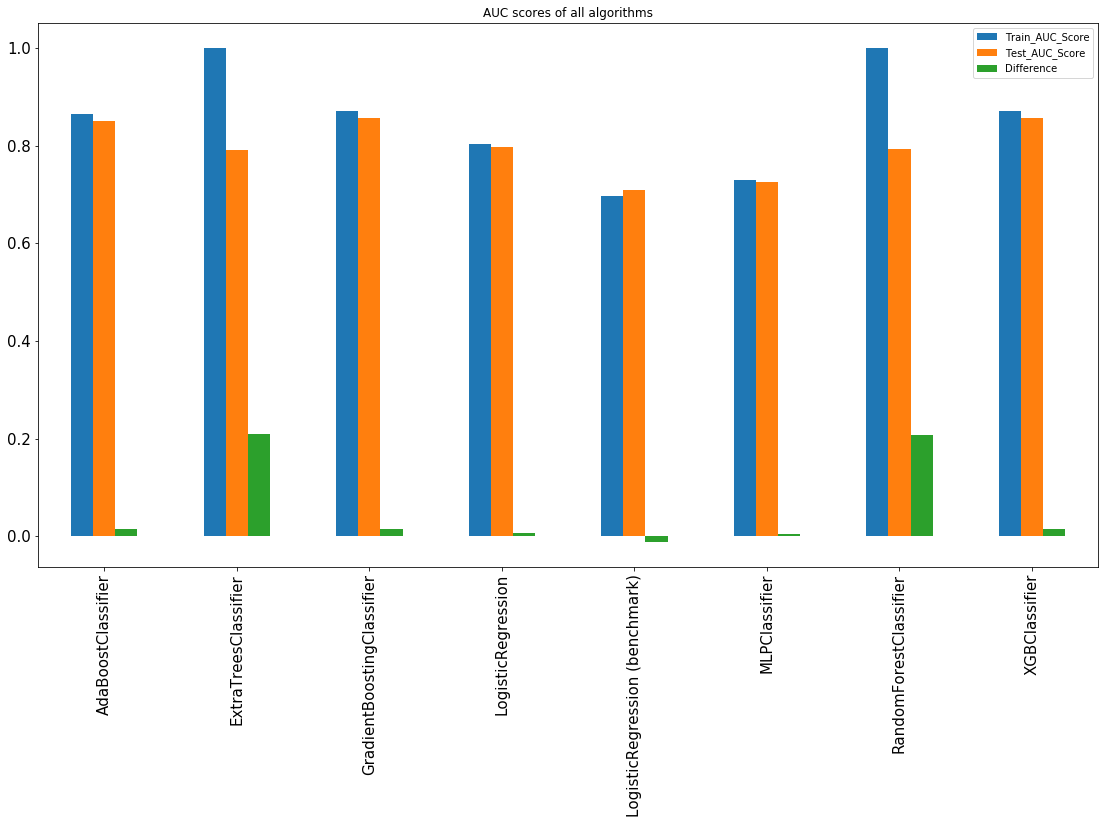

In [87]:
# Code to compare performance of all the models
row = ['AdaBoostClassifier', 'ExtraTreesClassifier', 'GradientBoostingClassifier', 'LogisticRegression', 
    'LogisticRegression (benchmark)', 'MLPClassifier', 'RandomForestClassifier', 'XGBClassifier']

col = ['Train_AUC_Score', 'Test_AUC_Score', 'Difference']

figure = df.loc[row , col].plot(kind = 'bar', 
title = 'AUC scores of all algorithms', figsize = (19, 10), fontsize = 15)

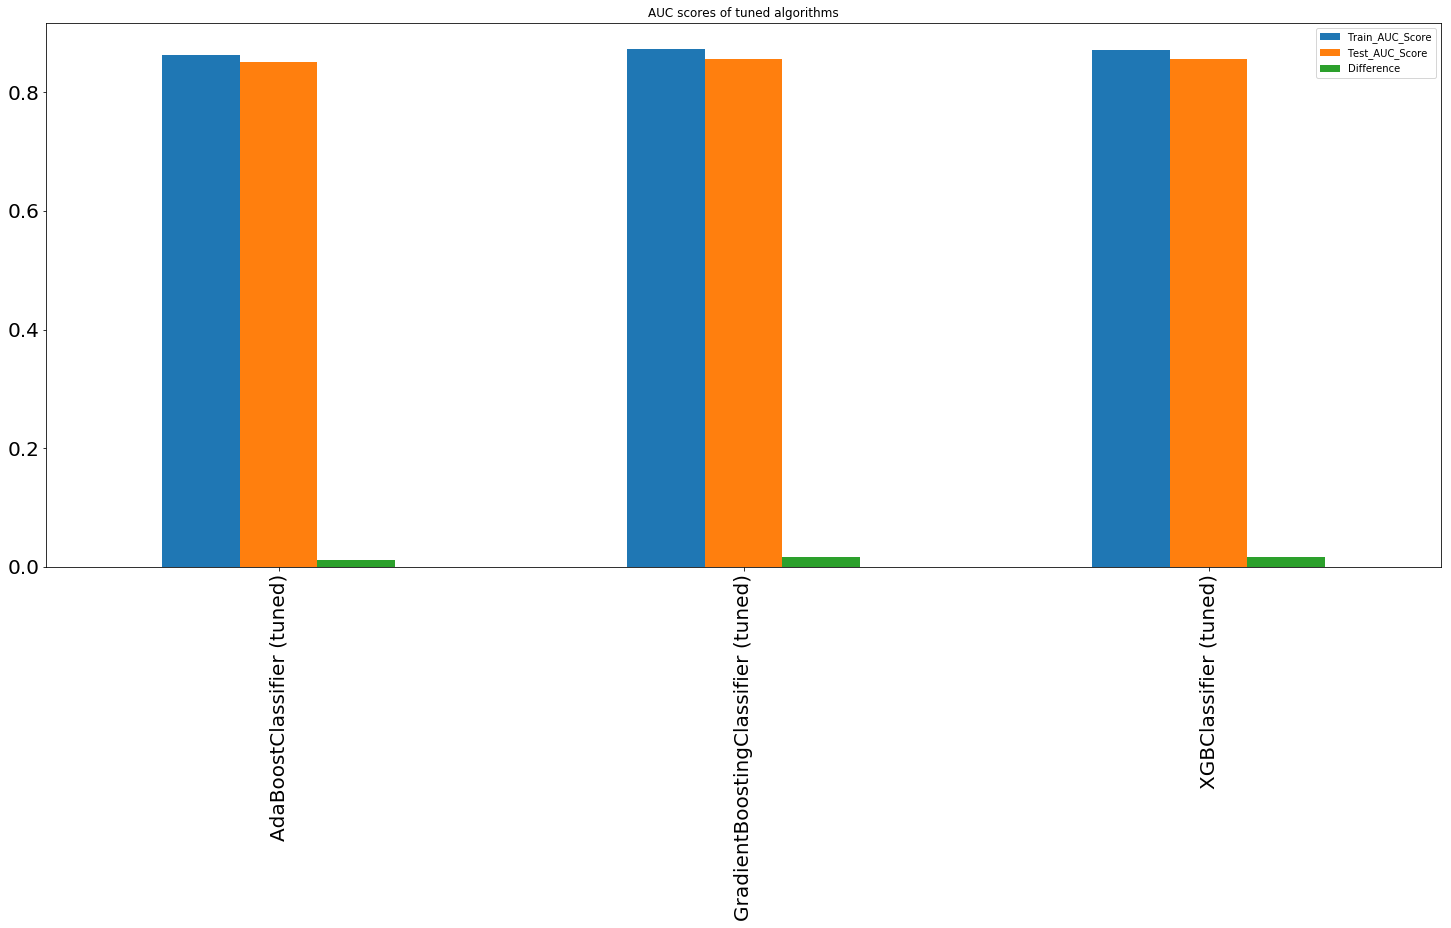

In [88]:
# Code to compare performance of tuned models
row = ['AdaBoostClassifier (tuned)', 'GradientBoostingClassifier (tuned)', 'XGBClassifier (tuned)']

col = ['Train_AUC_Score', 'Test_AUC_Score', 'Difference']

figure = df.loc[row , col].plot(kind = 'bar', 
                              title = 'AUC scores of tuned algorithms', figsize = (25, 10), fontsize = 20)

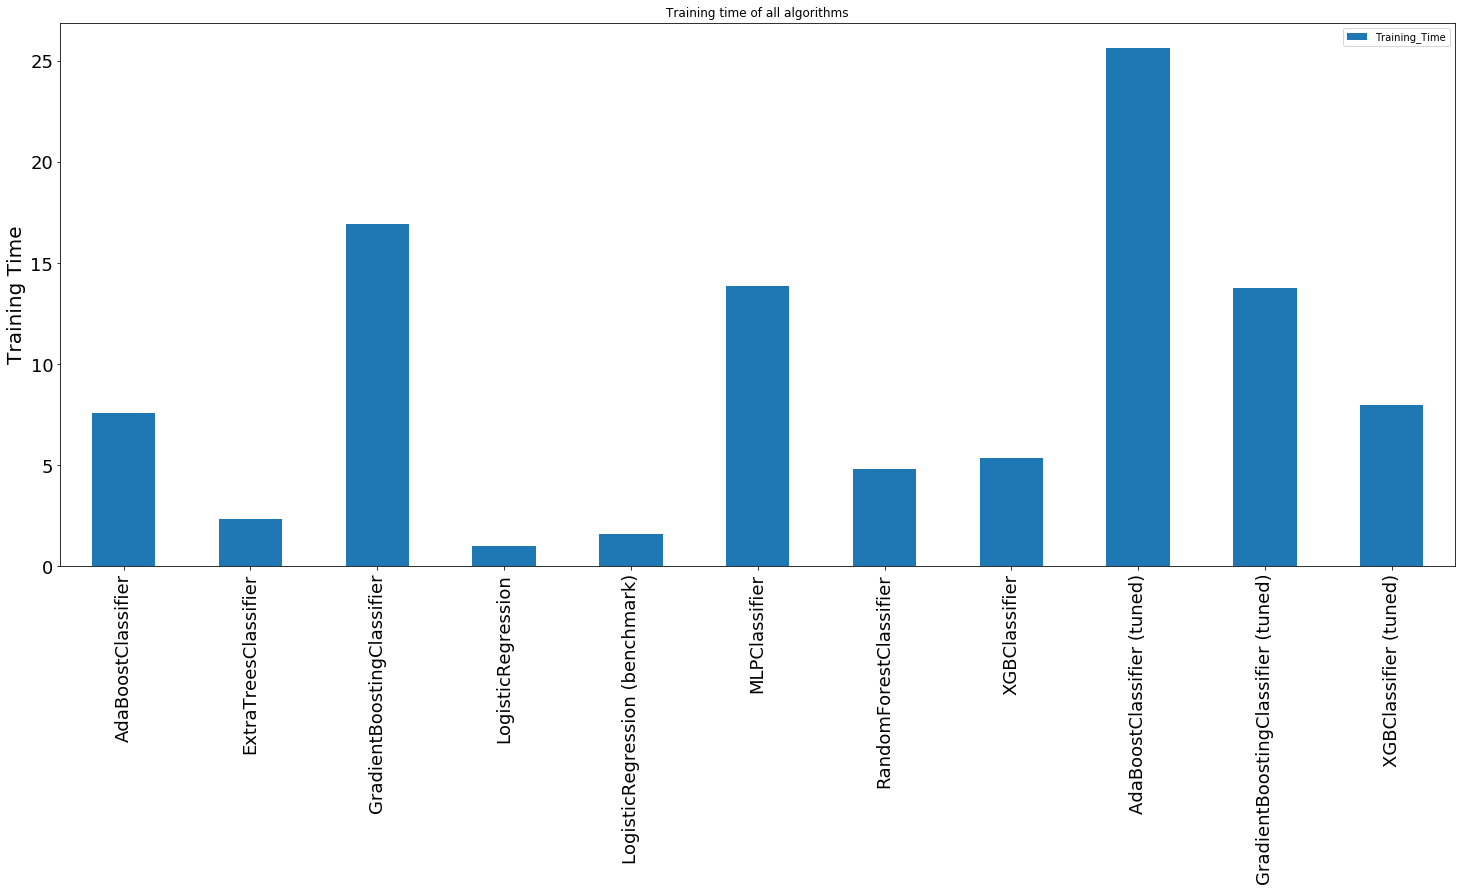

In [89]:
# Code to compare training time of all the models
figure = df.loc[: , ['Training_Time']].plot(kind = 'bar', 
title = 'Training time of all algorithms', figsize = (25, 10), fontsize = 18)

figure.set_ylabel('Training Time', fontsize = 20)

** After carefully analyzing all the above 3 graphs, I think XGBClassifier has proved to be the best model because it gave the best AUC score on test data and difference in training and testing score is also less which clearly indicates that it does not overfit the data. It's training time is also less and comparable to other models.
Although Gradient Boosting also performed well but it scored slightly lesser than XGBoost.**

### Plotting fpr vs tpr graph of XGBClassifier

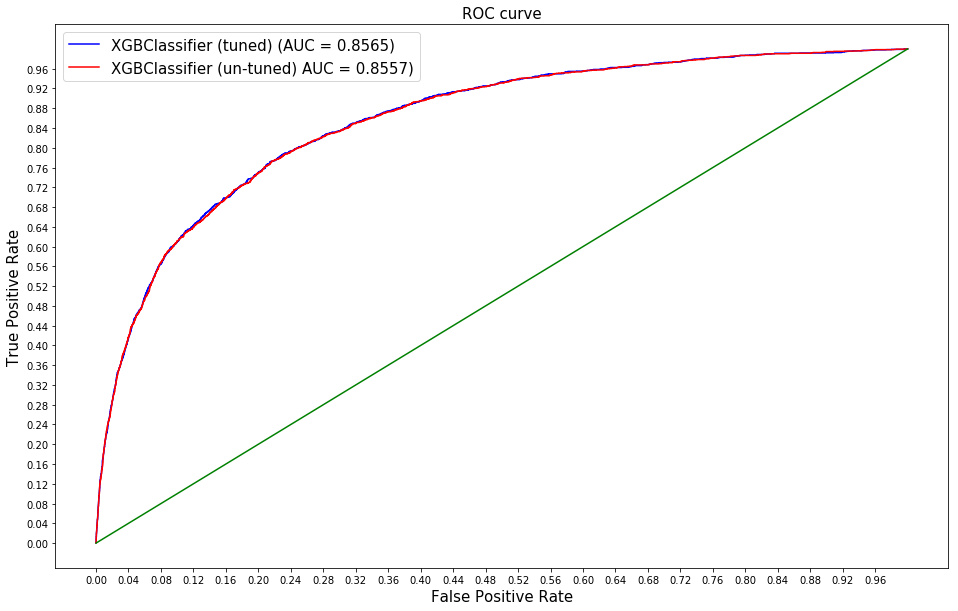

In [90]:
import pylab as plt2
plt2.figure(figsize=(16,10))
plt2.plot(fpr_xgb_test, tpr_xgb_test, '-b', label = 'XGBClassifier (tuned) (AUC = %0.4f)' % (xgb_best_scr_test))

predicted_prob = xgb_clf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, predicted_prob[:, 1])
xgb_auc = auc(fpr, tpr)

plt2.plot(fpr, tpr, '-r', label = 'XGBClassifier (un-tuned) AUC = %0.4f)' % (xgb_auc))
plt2.plot([0.0, 1.0], [0.0, 1.0], '-g')

plt2.xticks(np.arange(0.0, 1.0, 0.04))
plt2.yticks(np.arange(0.0, 1.0, 0.04))
plt2.xlabel('False Positive Rate', fontsize = 15)
plt2.ylabel('True Positive Rate', fontsize = 15)
plt2.legend(loc='bottom right', fontsize = 15)
plt2.title('ROC curve', fontsize = 15)
plt2.show()

### Getting feature importance

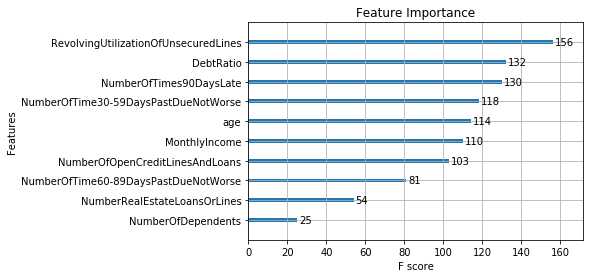

In [91]:
import xgboost
xgboost.plot_importance(xgb_grid.best_estimator_, height = 0.2, title = 'Feature Importance')

**Rejecting features having F-score less than 100 and training and testing rest of the features on tuned XGBClassifier**

In [92]:
# Cloning tuned model
new_model = clone(xgb_grid.best_estimator_)

l = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 
    'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLat']

new_X_train = X_train.loc[:, l]
new_y_train = y_train
new_X_test = X_test.loc[:, l]
new_y_test = y_test

print(new_X_train.shape)
print(new_y_train.shape)
print(new_X_test.shape)
print(new_y_test.shape)

start_time = time.time()
new_model.fit(new_X_train, new_y_train)
end_time = time.time()
time_taken = end_time - start_time

predicted_prob = new_model.predict_proba(new_X_train)
fpr, tpr, threshold = roc_curve(new_y_train, predicted_prob[:, 1])
auc_score_train = auc(fpr, tpr)

predicted_prob = new_model.predict_proba(new_X_test)
fpr, tpr, threshold = roc_curve(new_y_test, predicted_prob[:, 1])
auc_score_test = auc(fpr, tpr)

print("Training AUC score on reduced features = {}".format(auc_score_train))
print("Testing AUC score on reduced features = {}".format(auc_score_test))
print("Difference in AUC value (train - test) = {}".format(auc_score_train - auc_score_test))
print("Time taken to train the model on reduced features = {} sec".format(time_taken))

(120000, 7)
(120000,)
(30000, 7)
(30000,)
Training AUC score on reduced features = 0.845669877502
Testing AUC score on reduced features = 0.827017168927
Difference in AUC value (train - test) = 0.0186527085757
Time taken to train the model on reduced features = 6.66030597687 sec


** Reducing less important features did not improve the best AUC score that was obtained by training data on all features.**

## Observations

* **Best algorithm :-** `XGBoost Classifier`
* **Best algorithm parameters :-** 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
* **Best AUC score obtained :-** 0.856454070233
* **Time taken by tuned XGBoost model :-** 7.99334192276 sec
* **Improvement in AUC score obtained from `Benchmark` model:-**
    * **Training Data :-** 0.872339834748 - 0.69648388494 = 0.175855949808
    * **Testing Data :-** 0.856454070233 - 0.708517391115 = 0.147936679118
* **Variance explained by first 2 principle components of PCA :-** 99.999983%
* **PCA failed to improve the overall score.**
* **AUC score obtained after training and testing tuned XGBoost on reduced features :-** 0.827017168927
* **Number of independent features :-** 10
* **Number of dependent (or target) features :-** 1